# DEMO of some of my more or less usefull function
that is mostly for me, to keep a trace and remind me how to use it

but if it can be usefull to anyone I am happy to share and would love feedback/improvement comments 

In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pylab as plt

# zcen and sigma finders

np.histogram returns the same bins edggs as inputed:  True
Number of bins:  20
Number of bins edges:  21
Histogram shape:  20


<IPython.core.display.Javascript object>


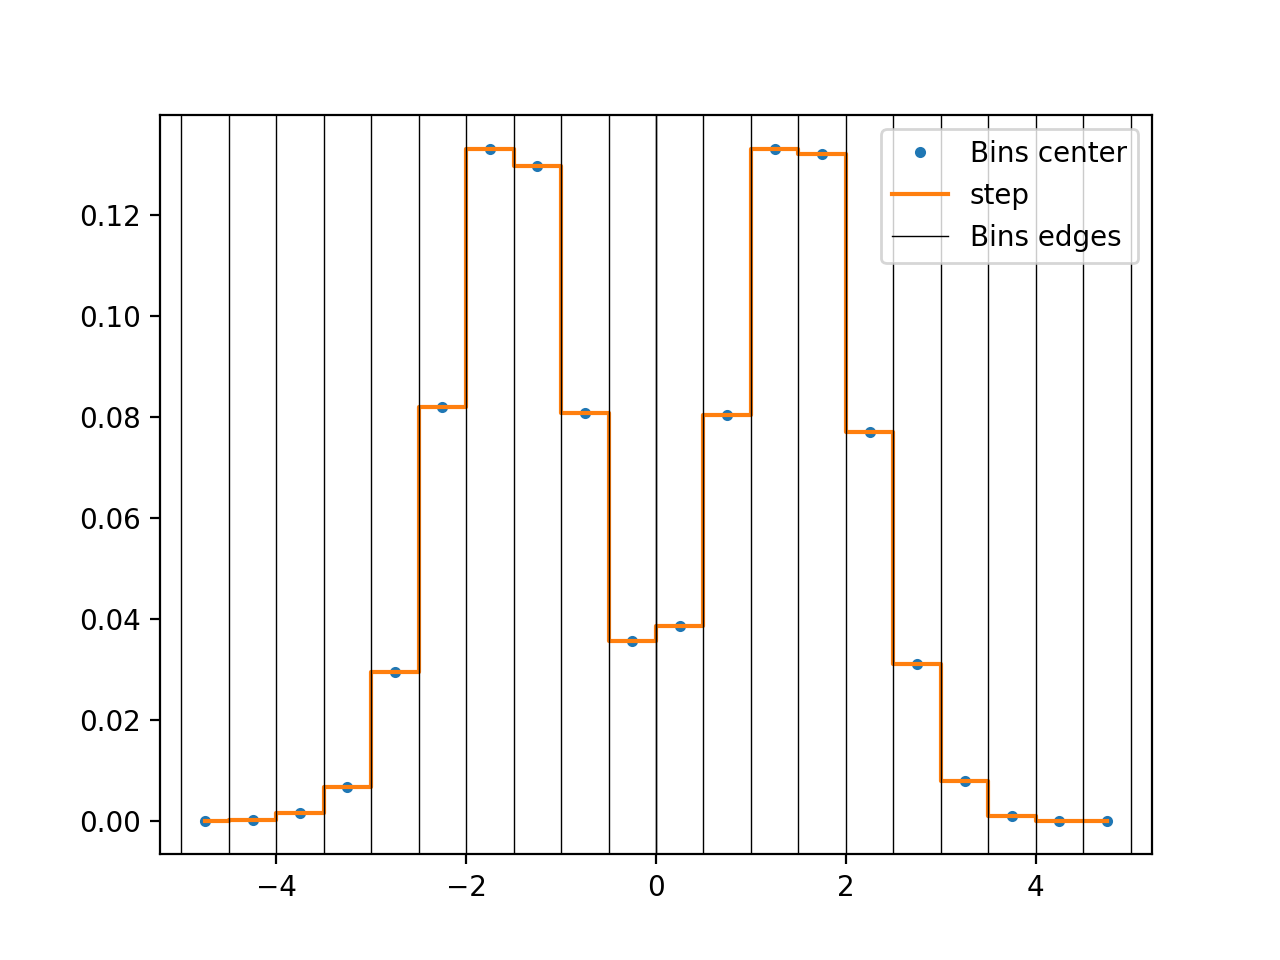

In [306]:
from my_utils import zcen
from scipy.stats import norm
###
Number_of_bins = 20
###
bins_edge = np.linspace( -5, 5, Number_of_bins+1 )
###
# x = np.random.normal(size=1000) ### normal distribution center at 0 std of 1
normal_distribution = norm(loc=-1.5, scale=0.7)
x = normal_distribution.rvs(10000)
normal_distribution = norm(loc=1.5, scale=0.7)
x_tmp = normal_distribution.rvs(10000)
x = np.concatenate( [x, x_tmp] )
###
histogram, bins_used_in_histogram = np.histogram( x, bins=bins_edge )
###
proba = histogram/histogram.sum()
###
print( 'np.histogram returns the same bins edggs as inputed: ',bins_used_in_histogram is bins_used_in_histogram )
###
print( 'Number of bins: ', Number_of_bins )
print( 'Number of bins edges: ', bins_used_in_histogram.shape[0] )
print( 'Histogram shape: ',histogram.shape[0] )
###

###
###

fig, ax = plt.subplots()

ax.plot( zcen(bins_edge), proba, '.', label='Bins center')
ax.step( zcen(bins_edge), proba, '', where='mid', label='step',  )
# ax.grid()
[ax.axvline(_x, lw=0.5, color='k') for _x in bins_edge]
ax.axvline( 0, lw=0.5, color='k', label='Bins edges')
ax.legend(loc='best')

## Found the 1, 2, 3 sigmas and plot it

In [302]:
from my_utils import find_zeros, sigma123_2D, find_confidence_interval, find_proba_limit
import scipy.optimize as so

In [307]:
p1, p2, p3 = sigma123_2D( proba, confidence_levels=[0.68, 0.95, 0.997] )
print('The three probability levels')
print(p1,p2,p3)
p1_zeros = find_zeros( zcen(bins_edge), proba/proba.sum()-p1 )
print(p1_zeros)
###
ONE_sigma   = so.brentq( find_confidence_interval, 0., 1., args=(proba,0.68) ) 
TWO_sigma   = so.brentq( find_confidence_interval, 0., 1., args=(proba,0.95) ) 
THREE_sigma = so.brentq( find_confidence_interval, 0., 1., args=(proba,0.997) ) 
print('The three probability levels')
print(ONE_sigma,TWO_sigma,THREE_sigma)
ONE_sigma_zeros = find_zeros( zcen(bins_edge), proba/proba.sum()-ONE_sigma )
print(ONE_sigma_zeros)
###
s1 = find_proba_limit( proba, confidence_level=0.68 )
s2 = find_proba_limit( proba, confidence_level=0.95 )
s3 = find_proba_limit( proba, confidence_level=0.997 )
print('The three probability levels')
print(s1,s2,s3)
s1_zeros = find_zeros( zcen(bins_edge), proba/proba.sum()-s1 )
print(s1_zeros)

The three probability levels
0.0809 0.031 0.00665
[-2.26       -0.75        0.75520833  2.21467391]
The three probability levels
0.08089999999942836 0.03099999999981072 0.006649999999515321
[-2.26       -0.75        0.75520833  2.21467391]
The three probability levels
0.08104147095179233 0.031484354838709656 0.0066951127819548616
[-2.25865266 -0.75145098  0.75654802  2.21339247]


<IPython.core.display.Javascript object>


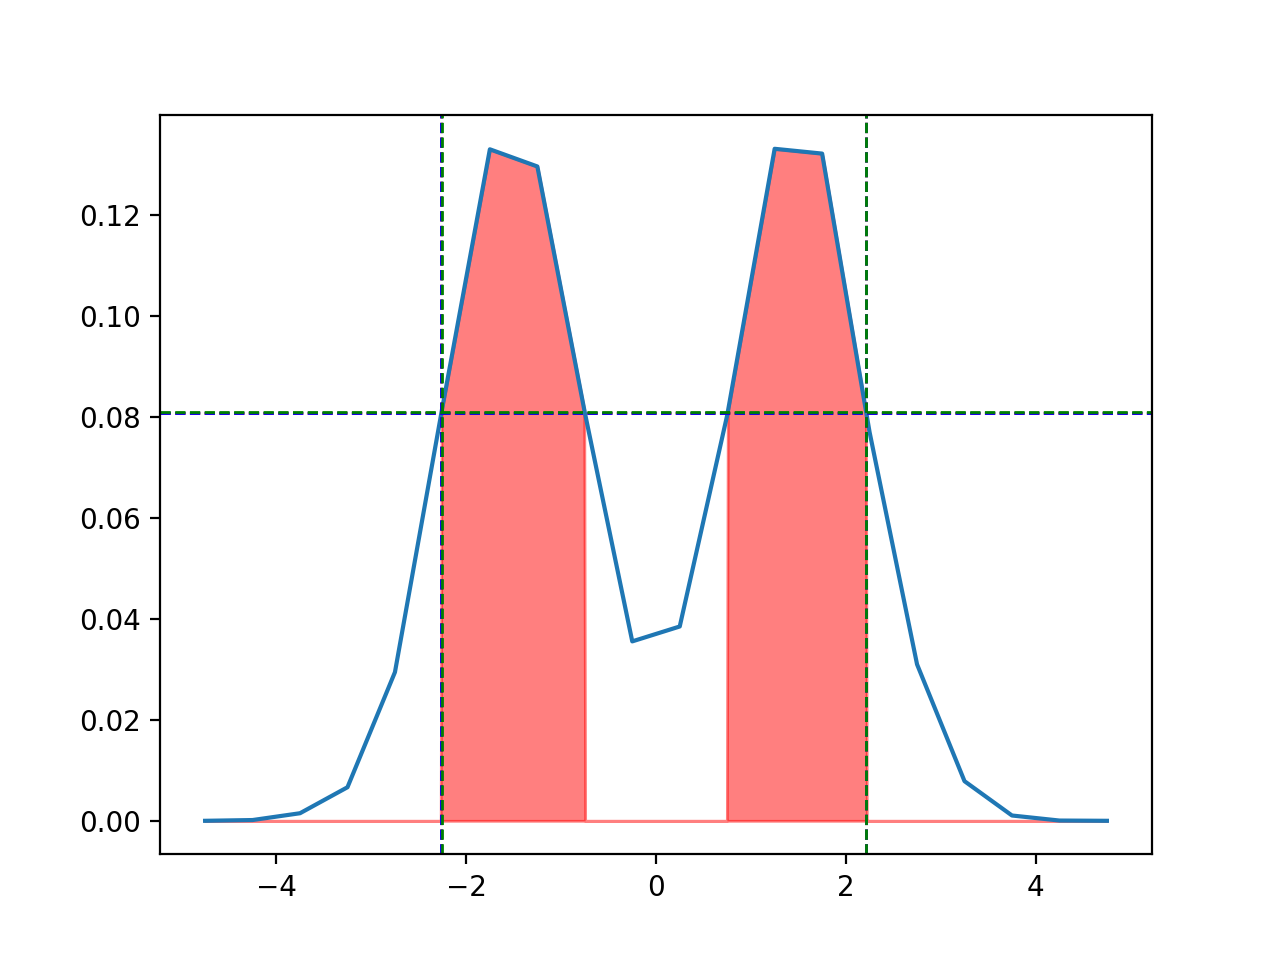

In [312]:
fig, ax = plt.subplots()

# ax.step( zcen(bins_edge), proba, '', where='mid', label='step',  )
ax.plot( zcen(bins_edge), proba  )

ax.axhline( p1, color='r', ls="dashed", lw=1 ) 
ax.axvline( p1_zeros.min(), color='r', ls="dashed", lw=1 ) 
ax.axvline( p1_zeros.max(), color='r', ls="dashed", lw=1 ) 

ax.axhline( ONE_sigma, color='b', ls="dashed", lw=1 ) 
ax.axvline( ONE_sigma_zeros.min(), color='b', ls="dashed", lw=1 ) 
ax.axvline( ONE_sigma_zeros.max(), color='b', ls="dashed", lw=1 ) 

ax.axhline( s1, color='g', ls="dashed", lw=1 ) 
ax.axvline( s1_zeros.min(), color='g', ls="dashed", lw=1 ) 
ax.axvline( s1_zeros.max(), color='g', ls="dashed", lw=1 ) 

###
new_binX = np.linspace( zcen(bins_edge).min(), zcen(bins_edge).max(), 1000 ) 
new_pdf = np.interp( new_binX, zcen(bins_edge), proba/proba.sum() )
ax.fill_between( new_binX, new_pdf*(new_pdf>=p1), color='r', alpha=0.5 ) 

# loadbar

In [48]:
from my_utils import loadbar
from time import sleep, time

In [50]:
Number_of_iterations = 10
tin=time()
for i in range(Number_of_iterations):
    sleep(0.5) ### in second
    loadbar( i, Number_of_iterations, tin )

[====================] 100.0%, 0.5 s/iter, remain 0.0 s, exec 5.2 s

# find_idx_nearest_val

In [51]:
from my_utils import find_idx_nearest_val

In [56]:
redshidts_of_snapshots = np.linspace( 6, 30, 25 )

print( 'ID of the snapshot closer to z=15: ', find_idx_nearest_val( redshidts_of_snapshots, 15 ) )

ID of the snapshot closer to z=15:  9


# sigma123_2D or find_confidence_interval
both give the same result

In [266]:
from my_utils import sigma123_2D 
from scipy.stats import multivariate_normal

The three probability levels
0.00199275326073 0.000327123652741 2.20083191446e-05


<IPython.core.display.Javascript object>


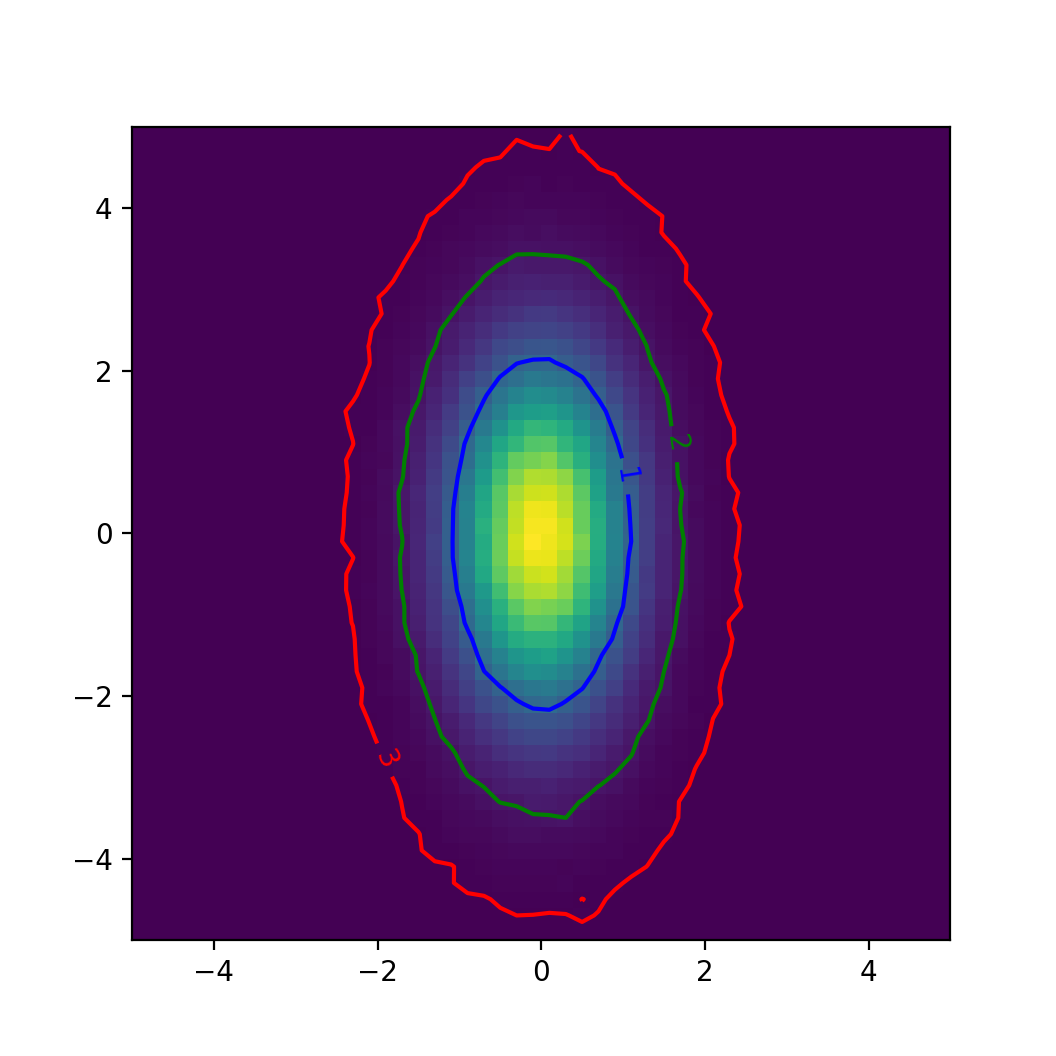

In [267]:
normals_2D = multivariate_normal( mean=[0,0], cov=[[0.5,0],[0,2]] )
xy = normals_2D.rvs(size=1000000)
###
Number_of_bins = 50
bins_edge = np.linspace( -5, 5, Number_of_bins+1 )
###
histogram2D, _, _ = np.histogram2d( xy.T[1], xy.T[0], bins=bins_edge )

### MAKE IT A PDF
proba2D = histogram2D/histogram2D.sum()

p1, p2, p3 = sigma123_2D( proba2D )
print('The three probability levels')
print(p1,p2,p3)

###
###

fig, ax = plt.subplots()

ax.pcolormesh( bins_edge, bins_edge, histogram2D )

CS = ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, levels=[p3,p2,p1], colors=('r','g','b') )
# ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, levels=[p3], colors=('r'), label=r'3sigma' )
# ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, levels=[p2], colors=('g'), label=r'2sigma' )
# ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, levels=[p1], colors=('b'), label=r'1sigma' )

### square plot
fig_size = fig.get_size_inches()
fig.set_size_inches( fig_size[1]*1.1, fig_size[1]*1.1 )

### label on contour plot

fmt = {}
strs = ['3', '2', '1']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10);


In [268]:
import scipy.optimize as so
from my_utils import find_confidence_interval

The three probability levels
0.0019927532611742804 0.00032712365429398766 2.200831801399503e-05


<IPython.core.display.Javascript object>


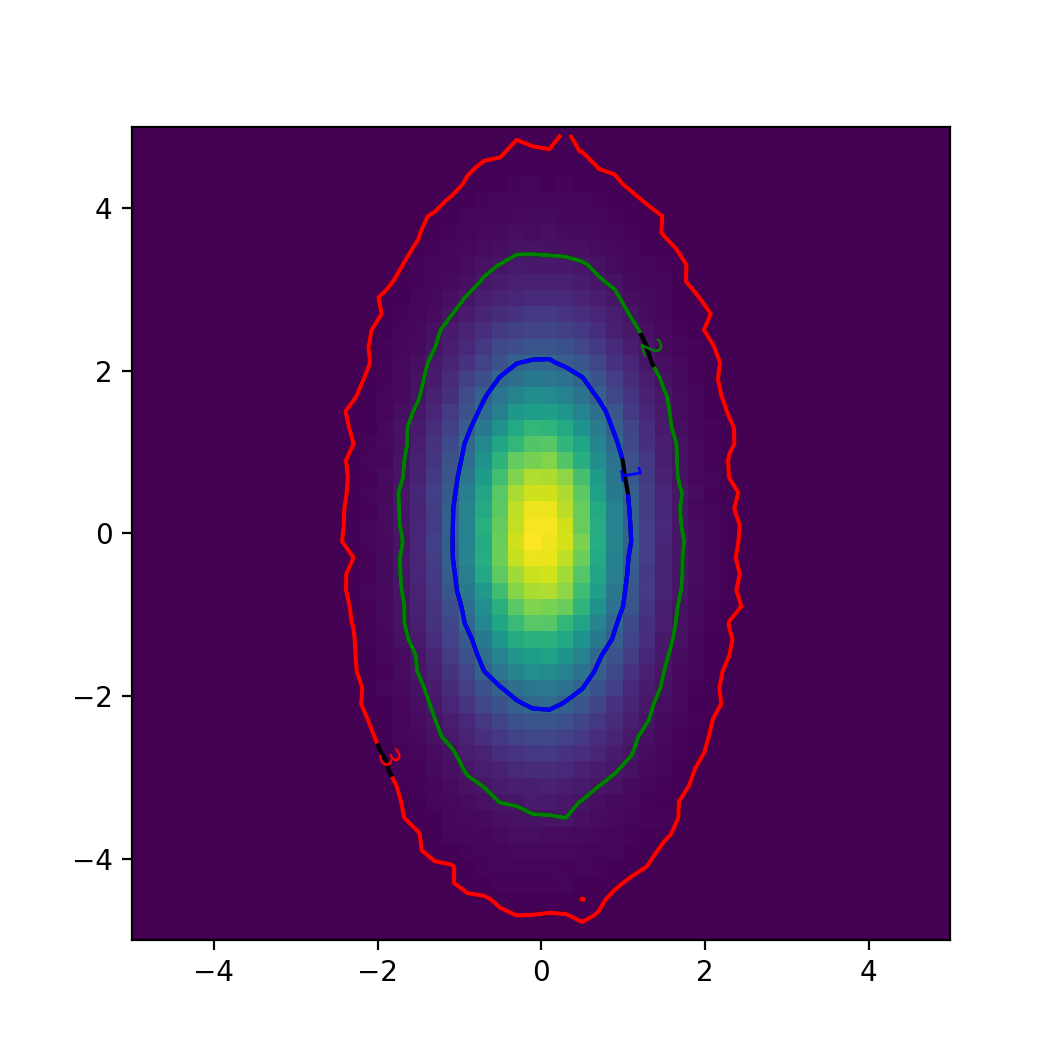

In [269]:
ONE_sigma   = so.brentq( find_confidence_interval, 0., 1., args=(proba2D,0.68) ) 
TWO_sigma   = so.brentq( find_confidence_interval, 0., 1., args=(proba2D,0.95) ) 
THREE_sigma = so.brentq( find_confidence_interval, 0., 1., args=(proba2D,0.997) ) 
print('The three probability levels')
print(ONE_sigma,TWO_sigma,THREE_sigma)
###
# X, Y = np.meshgrid( zcen(bins_edge), zcen(bins_edge) )

###
fig, ax = plt.subplots()

ax.pcolormesh( bins_edge, bins_edge, histogram2D )

CS = ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, levels=[p3,p2,p1], colors=('k','k','k') )

CS = ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, 
                 levels=[THREE_sigma, TWO_sigma, ONE_sigma], colors=('r','g','b') )

### square plot
fig_size = fig.get_size_inches()
fig.set_size_inches( fig_size[1]*1.1, fig_size[1]*1.1 )

### label on contour plot
fmt = {}
strs = ['3', '2', '1']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10);


In [270]:
from my_utils import find_proba_limit

The three probability levels
0.00201253841020179 0.00032960318327546374 2.2008319144636672e-05


<IPython.core.display.Javascript object>


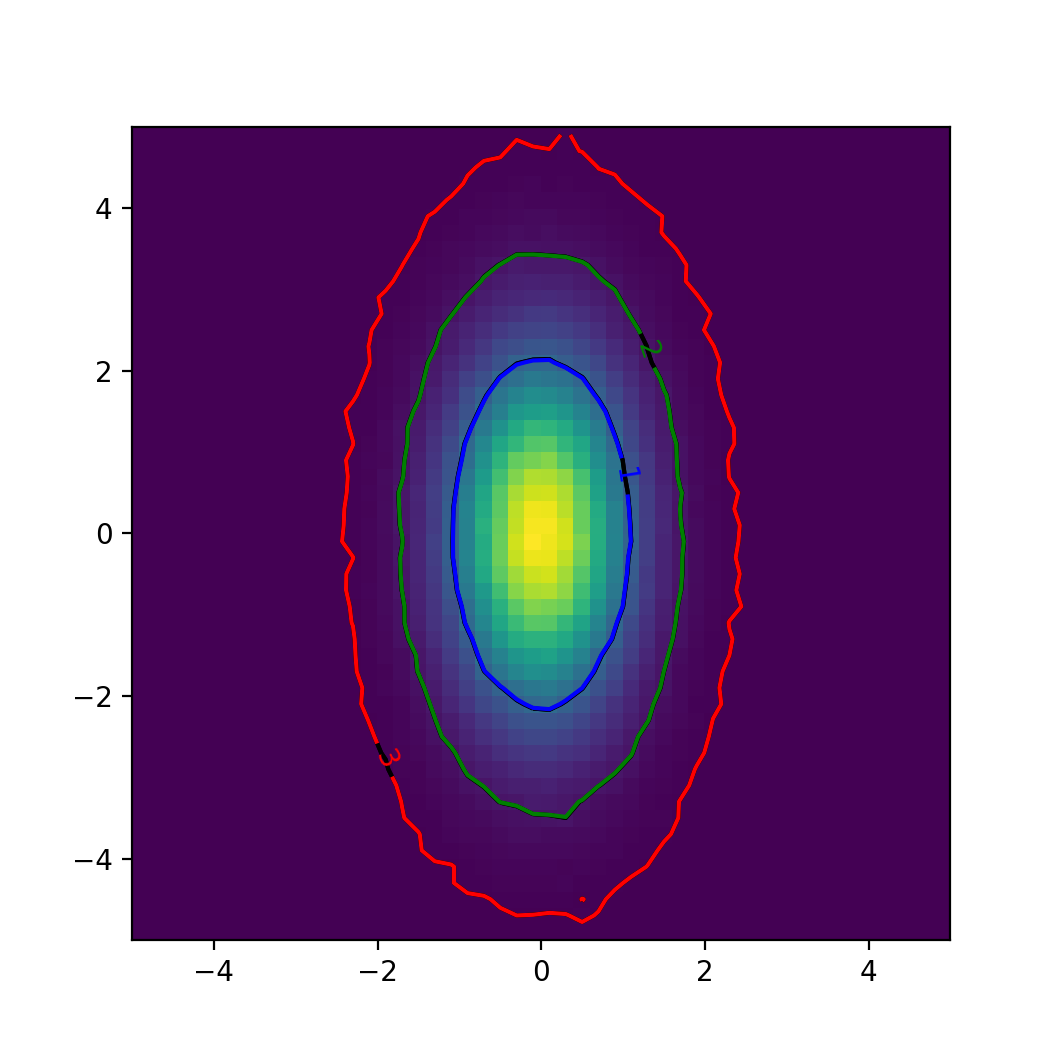

In [271]:
s1 = find_proba_limit( proba2D, confidence_level=0.68 )
s2 = find_proba_limit( proba2D, confidence_level=0.95 )
s3 = find_proba_limit( proba2D, confidence_level=0.997 )
print('The three probability levels')
print(s1,s2,s3)

###
fig, ax = plt.subplots()

ax.pcolormesh( bins_edge, bins_edge, histogram2D )

CS = ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, levels=[p3,p2,p1], colors=('k','k','k') )

CS = ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, 
                 levels=[THREE_sigma, TWO_sigma, ONE_sigma], colors=('k','k','k') )

CS = ax.contour( zcen(bins_edge), zcen(bins_edge), proba2D, 
                 levels=[s3, s2, s1], colors=('r','g','b') )

### square plot
fig_size = fig.get_size_inches()
fig.set_size_inches( fig_size[1]*1.1, fig_size[1]*1.1 )

### label on contour plot
fmt = {}
strs = ['3', '2', '1']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10);

# saveFig
execute one of the example with a figure !

In [221]:
from my_utils import saveFig

<IPython.core.display.Javascript object>


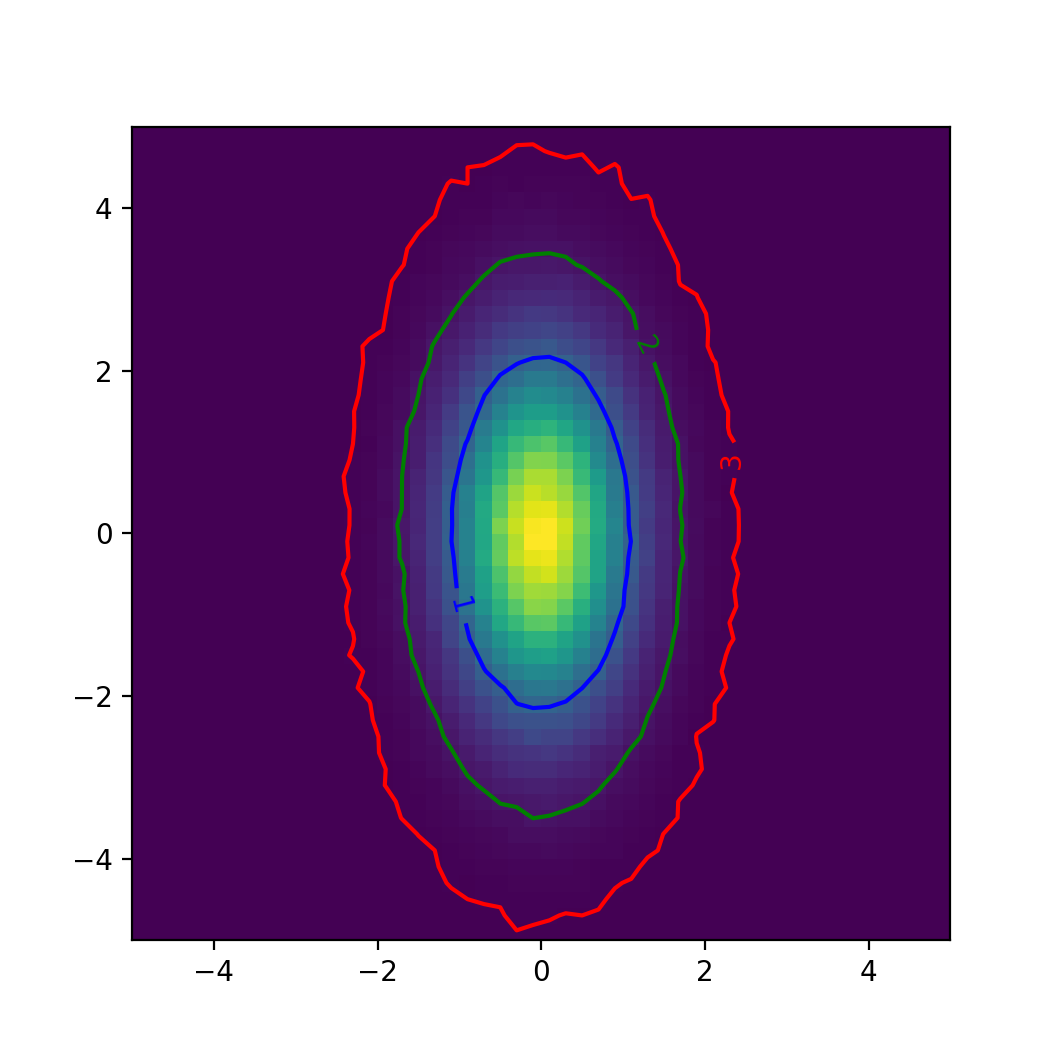

In [222]:
fig

In [215]:
saveFig( [fig,fig], 'figure_pdf_test' )

# Triangular plot

## From a MCMC sample

In [472]:
from my_utils import latex, plot_triangular

In [473]:
normals_2D = multivariate_normal( mean=[0,0], cov=[[0.5,0],[0,2]] )
xy = normals_2D.rvs(size=1000000)

normals_2D = multivariate_normal( mean=[2,2], cov=[[2,0],[0,0.5]] )
xy_tmp = normals_2D.rvs(size=1000000)

xy = np.concatenate( [xy, xy_tmp] )

In [474]:
######################
list_points = np.copy( xy.T )
param_label = [ latex( 'X' ),
                latex( 'Y' ),
              ]
units = [ latex( '' ),
          latex( '[log_{10}(M_{\odot})]'),
        ]
scales = [ 'lin', 'lin']
rangeBin = np.array( [list_points.min(axis=1), list_points.max(axis=1)] )

Number_of_bins = 50

# list_points_histo = np.array( [np.linspace(-2.5, -0.5, Nbin_histo+1),
#                                np.linspace(-0.5, 1, Nbin_histo+1),
#                                np.linspace(8, 10, Nbin_histo+1),
#                                np.linspace(0, 1, Nbin_histo+1)
#                               ] )

weights = np.ones(list_points.shape[1])
weights /= weights.sum()

NORMALIZATION FACTOR : 1.0


<IPython.core.display.Javascript object>


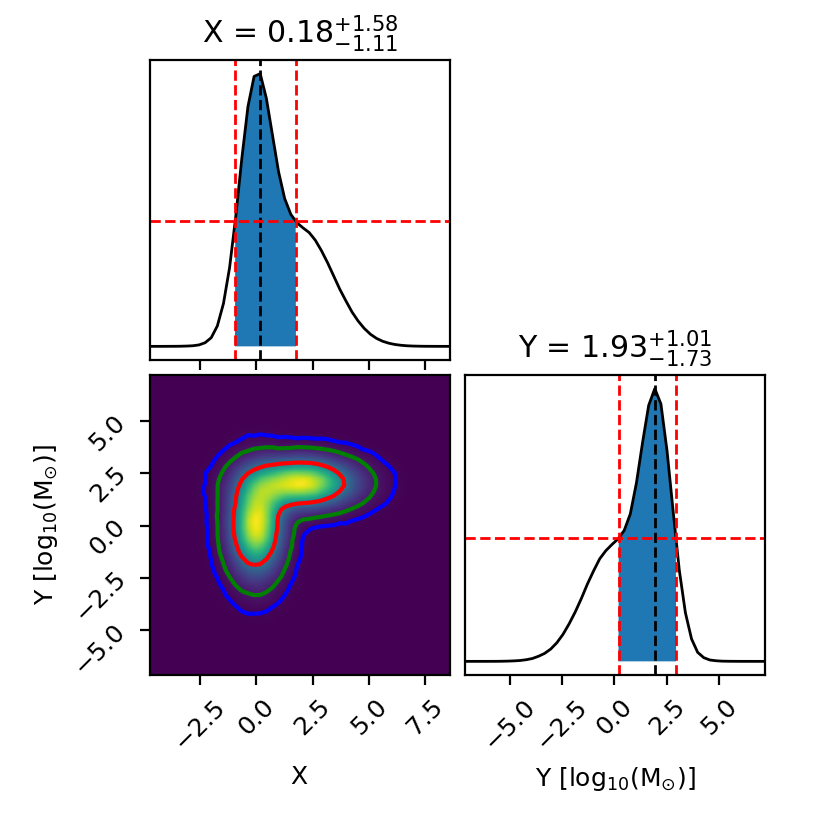

(<matplotlib.figure.Figure at 0x7fff2f4b17b8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff2f59feb8>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7fff2e2fdd30>]], dtype=object))

In [475]:
plot_triangular( list_points, 
                 weights, 
                 Nbin=Number_of_bins, 
                 param_label=param_label, 
                 rangeBin=rangeBin, 
                 units=units, 
                 scales=scales, 
                 DoInterp=False, 
                 addPoints=False, 
                 factor=1.5, 
                 DoHisto=True, 
                 justContour=False, 
                 addHDP=True, 
                 title1D=True, 
                 numberSigmaContour=3, 
                 figAndAxes=None, 
                 color=None, 
                 addLengend=None )
    

## Or from a grid of weighted points

In [477]:
x = np.random.rand(1000)*14 - 5
y = np.random.rand(1000)*10 -5

grid_x, grid_y = np.mgrid[rangeBin[0,0]:rangeBin[1,0]:50j, rangeBin[0,1]:rangeBin[1,1]:50j]

bins_edge_X = np.linspace( rangeBin[0,0],rangeBin[1,0], Number_of_bins+1 )
bins_edge_Y = np.linspace( rangeBin[0,1],rangeBin[1,1], Number_of_bins+1 )
###
histogram2D, _, _ = np.histogram2d( xy[:,0], xy[:,1], bins=[bins_edge_Y,bins_edge_X] )

grid_z2 = griddata( (grid_x.ravel(), grid_y.ravel()), histogram2D.ravel(), np.array([x,y]).T , method='cubic')

In [479]:
######################
list_points = np.copy( np.array([x,y]) )
param_label = [ latex( 'X' ),
                latex( 'Y' ),
              ]
units = [ latex( '' ),
          latex( '[log_{10}(M_{\odot})]'),
        ]
scales = [ 'lin', 'lin']
rangeBin = np.array( [list_points.min(axis=1), list_points.max(axis=1)] )

Number_of_bins = 50

weights = np.ones(list_points.shape[1])
weights /= weights.sum()

NORMALIZATION FACTOR : 2671284.20957


<IPython.core.display.Javascript object>


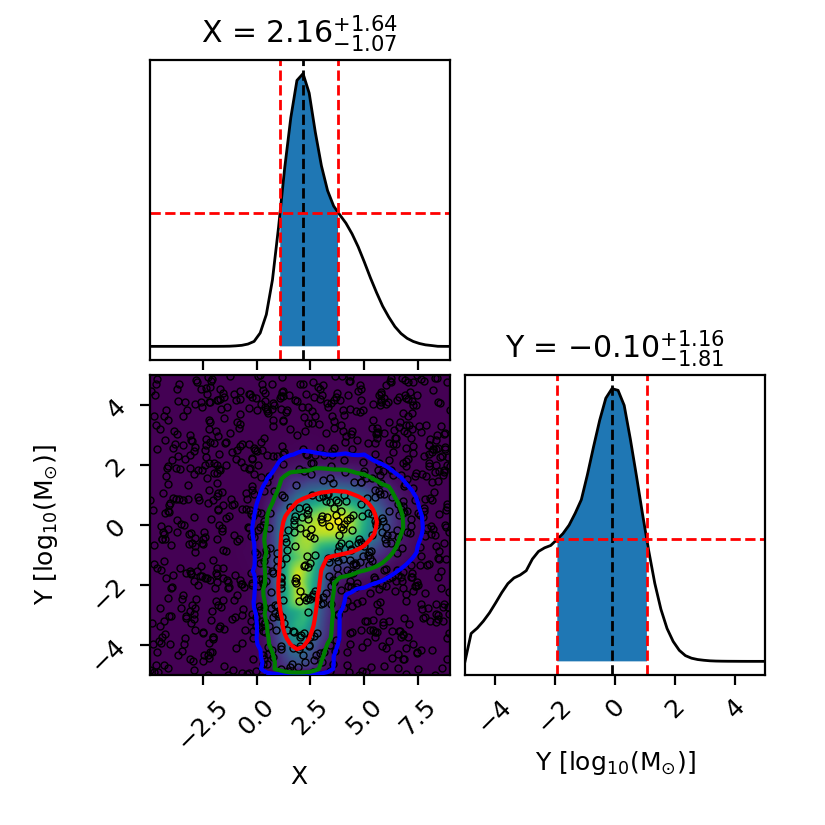

(<matplotlib.figure.Figure at 0x7fff2c2de748>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff2c2d5d30>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7fff47da3d30>]], dtype=object))

In [480]:
plot_triangular( list_points, 
                 grid_z2, 
                 Nbin=Number_of_bins, 
                 param_label=param_label, 
                 rangeBin=rangeBin, 
                 units=units, 
                 scales=scales, 
                 DoInterp=True, 
                 addPoints=True, 
                 factor=1.5, 
                 DoHisto=False, 
                 justContour=False, 
                 addHDP=True, 
                 title1D=True, 
                 numberSigmaContour=3, 
                 figAndAxes=None, 
                 color=None, 
                 addLengend=None )
    